<a href="https://colab.research.google.com/github/ipark3/Hank-Ian/blob/main/GitHub%20Project/dataset/code/exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the Relationship Between Air Quality and Health Issues

## Introduction
This project aims to explore the relationship between air quality and respiratory issues, specifically how pollutants contribute to increased cardiovascular disease. By analyzing this dataset, we hope to raise awareness of the growing dangers associated with pollution in our ever-expanding world.

## 1. Data Loading and Inspection
We begin by loading the dataset and inspecting its structure to understand the features available for analysis.

First we will show our dataset that shows the lead causes of Death in the USA.

Range for Year: Minimum = 1999, Maximum = 2017

Range for Deaths: Minimum = 21, Maximum = 2813503

Range for Age-adjusted Death Rate: Minimum = 2.6, Maximum = 1087.3

Unique values for Cause Name: ['Unintentional injuries' 'All causes' "Alzheimer's disease" 'Stroke'
 'CLRD' 'Diabetes' 'Heart disease' 'Influenza and pneumonia' 'Suicide'
 'Cancer' 'Kidney disease']

Outliers detected:
                   Cause Name  Deaths
0      Unintentional injuries  169936
5      Unintentional injuries   13840
10     Unintentional injuries   13059
36     Unintentional injuries    8971
39     Unintentional injuries    9527
...                       ...     ...
10808                  Cancer  549838
10811                  Cancer   13365
10812                  Cancer   10653
10814                  Cancer   10755
10860          Kidney disease   35525

[1384 rows x 2 columns]

Data cleaned by removing outliers outside the range [-3827.125, 7855.875].



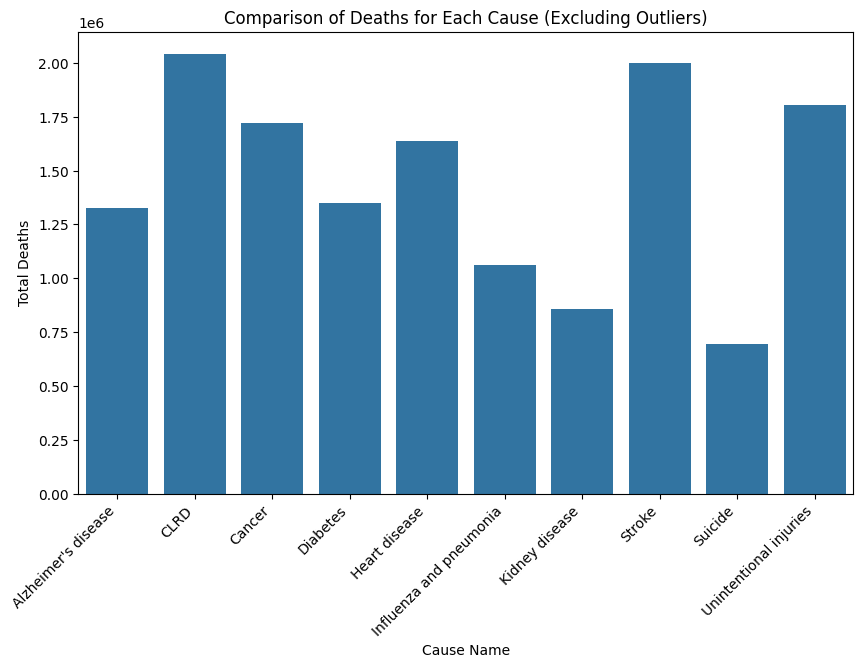

In [13]:
#from google.colab import drive
#drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Personal/NCHS_-_Leading_Causes_of_Death__United_States.csv')
df.columns = df.columns.str.strip()

# Identify numerical and categorical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Display range for numerical features
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}
for feature, value in numerical_range.items():
    print(f"Range for {feature}: Minimum = {value[0]}, Maximum = {value[1]}\n")

# Display unique values for a selected categorical feature
selected_column = 'Cause Name'
print(f"Unique values for {selected_column}: {df[selected_column].unique()}\n")

# Filter out rows where 'Cause Name' is not 'All causes'
filtered_df = df[df[selected_column] != 'All causes']

# Step 1: Detect Outliers in 'Deaths' column using IQR
if 'Deaths' in filtered_df.columns:
    Q1 = filtered_df['Deaths'].quantile(0.25)
    Q3 = filtered_df['Deaths'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers_df = filtered_df[(filtered_df['Deaths'] < lower_bound) | (filtered_df['Deaths'] > upper_bound)]
    print(f"Outliers detected:\n{outliers_df[['Cause Name', 'Deaths']]}\n")

    # Step 2: Cleaning Method - Removing Outliers
    # Optionally, if you want to keep the outliers for comparison, you can skip this step
    # Here, we create a new DataFrame `cleaned_df` without outliers
    cleaned_df = filtered_df[(filtered_df['Deaths'] >= lower_bound) & (filtered_df['Deaths'] <= upper_bound)]

    print(f"Data cleaned by removing outliers outside the range [{lower_bound}, {upper_bound}].\n")

    # Step 3: Aggregate and Plot Data After Cleaning
    cause_deaths = cleaned_df.groupby(selected_column)['Deaths'].sum().reset_index()

    # Plot bar plot for 'Cause Name' vs. 'Deaths' (after removing outliers)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=selected_column, y='Deaths', data=cause_deaths)
    plt.title(f'Comparison of Deaths for Each Cause (Excluding Outliers)')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.ylabel('Total Deaths')  # Update y-axis label
    plt.show()


In [17]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read in Excel
df = pd.read_excel('/content/drive/MyDrive/Personal/P_Data_Extract_From_World_Development_Indicators.xlsx')
df.columns = df.columns.str.strip()

# Display initial rows
df.head()

# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Get range for numerical features
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}

# Get unique values for categorical features
categorical_values = {feature: df[feature].unique() for feature in categorical_features}

# Filter the DataFrame for a specific country
selected_column = 'Country Name'
selected_value = 'United States'
filtered_df = df[df[selected_column] == selected_value]

# Output range for numerical features
for feature, value in numerical_range.items():
    print(f"Range for {feature}: Minimum = {value[0]}, Maximum = {value[1]}")

# Print filtered DataFrame for selected column and value
print("\nFiltered Data for Selected Country:")
print(filtered_df)

# Step 1: Identify Outliers using IQR Method
outliers = {}
for feature in numerical_features:
    Q1 = filtered_df[feature].quantile(0.25)
    Q3 = filtered_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = filtered_df[(filtered_df[feature] < lower_bound) | (filtered_df[feature] > upper_bound)]

# Display examples of outliers
print("\nOutliers Detected:")
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"\nOutliers for {feature}:\n", outlier_df[[feature]])

# Step 3: Clean Outliers by Capping to Bounds
cleaned_df = filtered_df.copy()
for feature in numerical_features:
    Q1 = cleaned_df[feature].quantile(0.25)
    Q3 = cleaned_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df[feature] = cleaned_df[feature].clip(lower=lower_bound, upper=upper_bound)

# Output the cleaned DataFrame
print("\nCleaned Data After Outlier Treatment:")
print(cleaned_df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Filtered Data for Selected Country:
                                           Series Name        Series Code  \
206  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

      Country Name Country Code 1990 [YR1990] 2000 [YR2000] 2014 [YR2014]  \
206  United States          USA     14.104067     12.756295      8.510127   

    2015 [YR2015] 2016 [YR2016] 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]  \
206      8.190742       7.40835      7.790406      7.822007      7.176021   

    2020 [YR2020] 2021 [YR2021] 2022 [YR2022] 2023 [YR2023]  
206      7.814858            ..            ..            ..  

Outliers Detected:

Cleaned Data After Outlier Treatment:
                                           Series Name        Series Code  \
206  PM2.5 air pollution, mean annual exposure (mic...  EN.ATM.PM25.MC.M3   

      Country Name Country Code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Range for Data Value: Minimum = 0.00, Maximum = 424.70, Average = 21.43


Unique values for Name: ['Boiler Emissions- Total SO2 Emissions' 'Fine particles (PM 2.5)'
 'Nitrogen dioxide (NO2)'
 'Asthma emergency department visits due to PM2.5'
 'Annual vehicle miles traveled'
 'Respiratory hospitalizations due to PM2.5 (age 20+)' 'Ozone (O3)'
 'Asthma hospitalizations due to Ozone'
 'Boiler Emissions- Total NOx Emissions'
 'Boiler Emissions- Total PM2.5 Emissions'
 'Outdoor Air Toxics - Formaldehyde'
 'Asthma emergency departments visits due to Ozone'
 'Cardiovascular hospitalizations due to PM2.5 (age 40+)'
 'Cardiac and respiratory deaths due to Ozone' 'Deaths due to PM2.5'
 'Outdoor Air Toxics - Benzene' 'Annual vehicle miles traveled (trucks)'
 'Annual vehicle miles traveled (cars)']


Outliers Detected:

Outliers for Geo Join ID:
        Geo Join ID
5183  

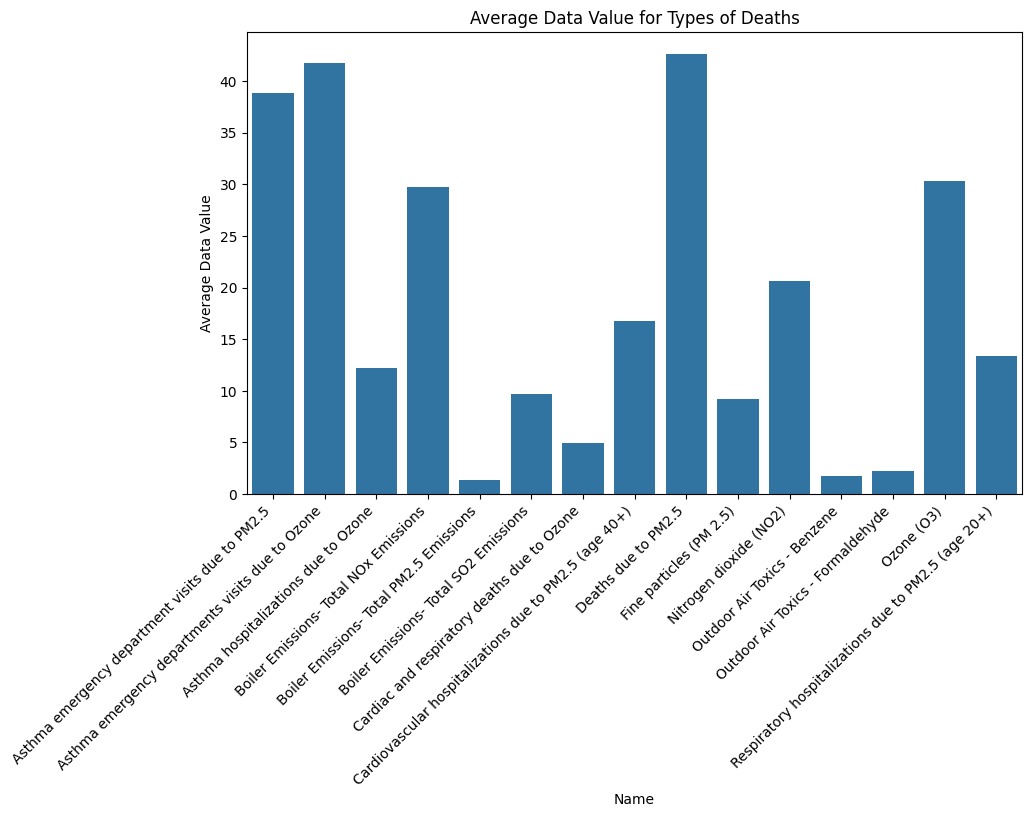

In [15]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
df = pd.read_csv('/content/drive/MyDrive/Personal/Air_Quality.csv')
df.columns = df.columns.str.strip()

# Display initial rows
df.head()

# Separate numerical and categorical columns
numerical_features = df.select_dtypes(include=['float64']).columns
categorical_features = df.select_dtypes(include=['object']).columns

# Get range for numerical features
numerical_range = {feature: (df[feature].min(), df[feature].max()) for feature in numerical_features}

# Get unique values for categorical features
categorical_values = {feature: df[feature].unique() for feature in categorical_features}

# Print range for 'Data Value' if present
if 'Data Value' in numerical_features:
    min_value, max_value = numerical_range['Data Value']
    avg_value = df['Data Value'].mean()  # Calculate average
    print(f"Range for Data Value: Minimum = {min_value:.2f}, Maximum = {max_value:.2f}, Average = {avg_value:.2f}")
print('\n')

# Print unique values for 'Name' if present
if 'Name' in categorical_values:
    print(f"Unique values for Name: {categorical_values['Name']}\n")

# Step 1: Identify Outliers using IQR Method for numerical features
outliers = {}
for feature in numerical_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[feature] = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]

# Display examples of outliers
print("\nOutliers Detected:")
for feature, outlier_df in outliers.items():
    if not outlier_df.empty:
        print(f"\nOutliers for {feature}:\n", outlier_df[[feature]])

# Step 3: Clean Outliers by Capping to Bounds
cleaned_df = df.copy()
for feature in numerical_features:
    Q1 = cleaned_df[feature].quantile(0.25)
    Q3 = cleaned_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    cleaned_df[feature] = cleaned_df[feature].clip(lower=lower_bound, upper=upper_bound)

# Display the cleaned data
print("\nCleaned Data After Outlier Treatment:")
print(cleaned_df.head())

# Calculate the average 'Data Value' for each 'Name' category, excluding specific values
filtered_data = cleaned_df[~cleaned_df['Name'].isin([
    'Annual vehicle miles traveled',
    'Annual vehicle miles traveled (cars)',
    'Annual vehicle miles traveled (trucks)'
])]
average_data_value = filtered_data.groupby('Name')['Data Value'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.barplot(x='Name', y='Data Value', data=average_data_value)
plt.title('Average Data Value for Types of Deaths')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Name')
plt.ylabel('Average Data Value')
plt.show()